<a href="https://colab.research.google.com/github/divinelof/21120404_dissertation/blob/main/NB5_A_EccomerceEvaluation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SETUP**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Libraries**

In [ ]:
# General imports
import numpy as np
import pandas as pd
import os, sys, gc, warnings, random, datetime

from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_auc_score, roc_curve
warnings.filterwarnings('ignore')

# **UTILS**

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [ ]:
def plotRocAuc(y_true, y_pred, title):
  import matplotlib.pyplot as plt
  
  ns_probs = [0 for _ in range(len(y_true))]
  auc = roc_auc_score(y_true, y_pred)
  ns_fpr, ns_tpr, _ = roc_curve(y_true, ns_probs)
  lr_fpr, lr_tpr, _ = roc_curve(y_true, y_pred)

  # plot the roc curve for the model
  plt.plot(lr_fpr, lr_tpr, marker='.', label="AUC="+str(auc))
  plt.plot(ns_fpr, ns_tpr, linestyle='--')

  # axis labels
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(title)
  # show the legend
  plt.legend()
  # show the plot
  plt.show()

# **Model Predictions**

In [ ]:
data_path = '/content/drive/MyDrive/EcommerceFraudDetection/'

# -------------------------------------------------------------
# -------------------------------------------------------------
# MAIN MODEL PREDICTION
# -------------------------------------------------------------
# -------------------------------------------------------------

ValidationLabel = pd.read_csv(f"{data_path}FinalValidation.csv")["isFraud"].astype(int)

# -------------------------------------------------------------
# -------------------------------------------------------------
# MAIN MODEL PREDICTION
# -------------------------------------------------------------
# -------------------------------------------------------------

XGBoostPredictions = pd.read_csv(f"{data_path}valPredXGB.csv").values
LGBoostPredictions = pd.read_csv(f"{data_path}valPredLGB.csv").values
RandomForestPredictions = pd.read_csv(f"{data_path}valPredRF.csv").values
SVMPredictions = pd.read_csv(f"{data_path}valPredSVM.csv").values

# -------------------------------------------------------------
# -------------------------------------------------------------
# 1% Noise Rate
# -------------------------------------------------------------
# -------------------------------------------------------------

XGBoostPredictions_1P = pd.read_csv(f"{data_path}valPredXGB_(1% Noise Rate).csv").values
LGBoostPredictions_1P = pd.read_csv(f"{data_path}valPredLGB_(1% Noise Rate).csv").values
RandomForestPredictions_1P = pd.read_csv(f"{data_path}valPredRF_(1% Noise Rate).csv").values
SVMPredictions_1P = pd.read_csv(f"{data_path}valPredSVM_(1% Noise Rate).csv").values

# **Classification Report**

### **XGBOOST**

In [ ]:
print("-"*55)
print("XGBOOST CLASSIFICATION REPORT")
print("-"*55)
print(classification_report(ValidationLabel, [1 if x > 0.5 else 0 for x in XGBoostPredictions]))
print("-"*55)
print("-"*55)

-------------------------------------------------------
XGBOOST CLASSIFICATION REPORT
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99    113975
           1       0.76      0.76      0.76      4133

    accuracy                           0.98    118108
   macro avg       0.87      0.88      0.88    118108
weighted avg       0.98      0.98      0.98    118108

-------------------------------------------------------
-------------------------------------------------------


### **LIGHT GBM**

In [ ]:
print("-"*55)
print("LGBOOST CLASSIFICATION REPORT")
print("-"*55)
print(classification_report(ValidationLabel, [1 if x > 0.5 else 0 for x in LGBoostPredictions]))
print("-"*55)
print("-"*55)

-------------------------------------------------------
LGBOOST CLASSIFICATION REPORT
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.96      0.98    113975
           1       0.44      0.77      0.56      4133

    accuracy                           0.96    118108
   macro avg       0.72      0.87      0.77    118108
weighted avg       0.97      0.96      0.96    118108

-------------------------------------------------------
-------------------------------------------------------


### **RANDOM FOREST**

In [ ]:
print("-"*55)
print("RANDOM FORST MODEL CLASSIFICATION REPORT")
print("-"*55)
print(classification_report(ValidationLabel, [1 if x > 0.5 else 0 for x in RandomForestPredictions]))
print("-"*55)
print("-"*55)

-------------------------------------------------------
RANDOM FORST MODEL CLASSIFICATION REPORT
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.99    113975
           1       0.65      0.49      0.56      4133

    accuracy                           0.97    118108
   macro avg       0.82      0.74      0.77    118108
weighted avg       0.97      0.97      0.97    118108

-------------------------------------------------------
-------------------------------------------------------


### **SVM**

In [ ]:
print("-"*55)
print("SUPPORT VECTOR MACHINE MODEL CLASSIFICATION REPORT")
print("-"*55)
print(classification_report(ValidationLabel, [1 if x > 0.5 else 0 for x in SVMPredictions]))
print("-"*55)
print("-"*55)

-------------------------------------------------------
SUPPORT VECTOR MACHINE MODEL CLASSIFICATION REPORT
-------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    113975
           1       0.52      0.49      0.50      4133

    accuracy                           0.97    118108
   macro avg       0.75      0.74      0.74    118108
weighted avg       0.97      0.97      0.97    118108

-------------------------------------------------------
-------------------------------------------------------


# **Confusion Matrix**

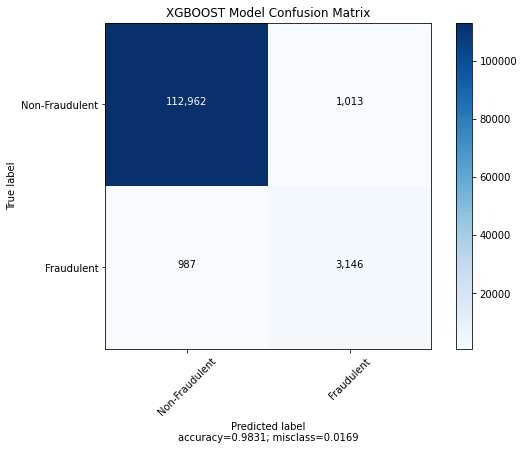

In [ ]:
cmXGB = confusion_matrix(ValidationLabel, [1 if x > 0.5 else 0 for x in XGBoostPredictions])
plot_confusion_matrix(cm = cmXGB,
                      target_names = ["Non-Fraudulent", "Fraudulent"],
                      title='XGBOOST Model Confusion Matrix',
                      cmap=None,
                      normalize=False)

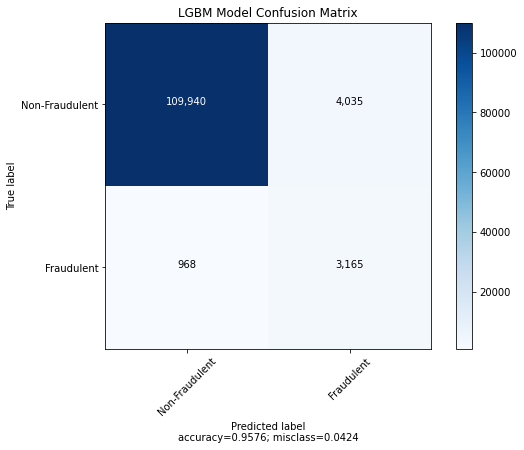

In [ ]:
cmLGB = confusion_matrix(ValidationLabel, [1 if x > 0.5 else 0 for x in LGBoostPredictions])
plot_confusion_matrix(cm = cmLGB,
                      target_names = ["Non-Fraudulent", "Fraudulent"],
                      title='LGBM Model Confusion Matrix',
                      cmap=None,
                      normalize=False)

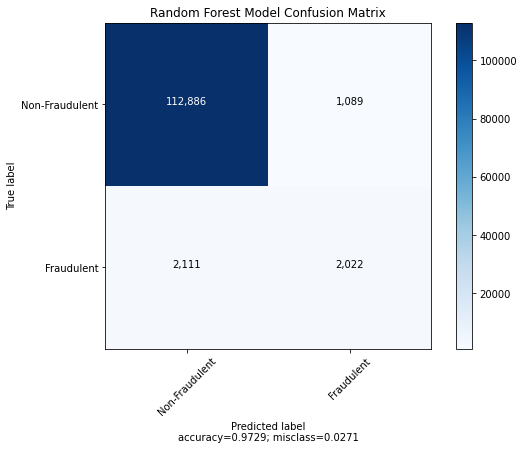

In [ ]:
cmRF = confusion_matrix(ValidationLabel, [1 if x > 0.5 else 0 for x in RandomForestPredictions])
plot_confusion_matrix(cm = cmRF,
                      target_names = ["Non-Fraudulent", "Fraudulent"],
                      title='Random Forest Model Confusion Matrix',
                      cmap=None,
                      normalize=False)

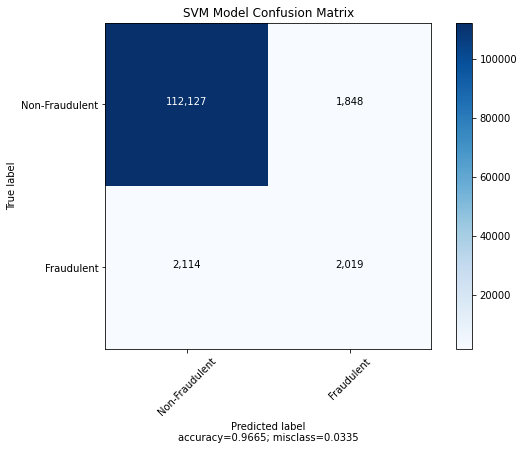

In [ ]:
cmSVM = confusion_matrix(ValidationLabel, [1 if x > 0.5 else 0 for x in SVMPredictions])
plot_confusion_matrix(cm = cmSVM,
                      target_names = ["Non-Fraudulent", "Fraudulent"],
                      title='SVM Model Confusion Matrix',
                      cmap=None,
                      normalize=False)

# **ROC AUC CURVE**

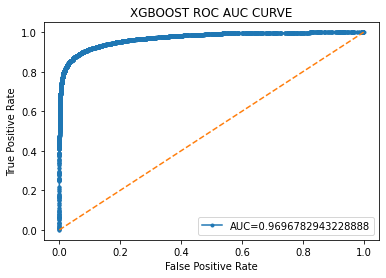

In [ ]:
plotRocAuc(ValidationLabel, XGBoostPredictions, "XGBOOST ROC AUC CURVE")

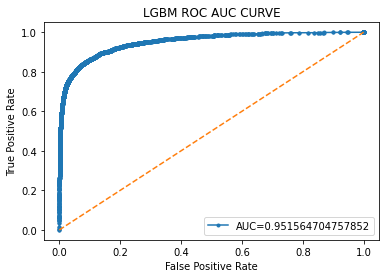

In [ ]:
plotRocAuc(ValidationLabel, LGBoostPredictions, "LGBM ROC AUC CURVE")

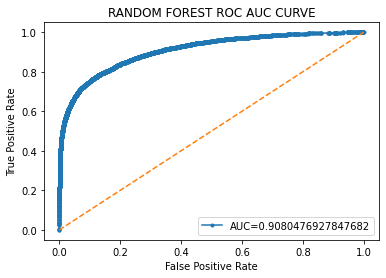

In [ ]:
plotRocAuc(ValidationLabel, RandomForestPredictions, "RANDOM FOREST ROC AUC CURVE")

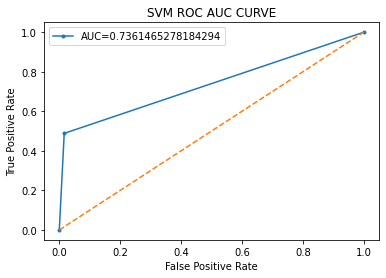

In [ ]:
plotRocAuc(ValidationLabel, SVMPredictions, "SVM ROC AUC CURVE")

# **ROC AUC SCORE**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
def metricsDf(allPredictions):
  scoreDict = {"Accuracy":[], "Precision":[], "Recall":[], "ROC AUC":[]}
  for predictions in allPredictions:
    scoreDict["ROC AUC"].append(np.round(roc_auc_score(ValidationLabel, predictions), 3))
    scoreDict["Accuracy"].append(np.round(accuracy_score(ValidationLabel, [1 if x > 0.5 else 0 for x in predictions]), 3))
    scoreDict["Precision"].append(np.round(precision_score(ValidationLabel, [1 if x > 0.5 else 0 for x in predictions]), 3))
    scoreDict["Recall"].append(np.round(recall_score(ValidationLabel, [1 if x > 0.5 else 0 for x in predictions]), 3))

  return pd.DataFrame(scoreDict, index = ["XGBOOST", "LGBM", "SVM", "RANDOM FOREST"])

### **Model Performance**

In [ ]:
metricsDf(allPredictions = [XGBoostPredictions, LGBoostPredictions, SVMPredictions, RandomForestPredictions])

,Accuracy,Precision,Recall,ROC AUC
XGBOOST,0.983,0.756,0.761,0.970
LGBM,0.958,0.440,0.766,0.952
SVM,0.966,0.522,0.489,0.736
RANDOM FOREST,0.973,0.650,0.489,0.908


### **Model Performance (1% Noise)**

In [ ]:
metricsDf([XGBoostPredictions_1P, LGBoostPredictions_1P, SVMPredictions_1P, RandomForestPredictions_1P])

,Accuracy,Precision,Recall,ROC AUC
XGBOOST,0.981,0.716,0.756,0.966
LGBM,0.952,0.403,0.773,0.948
SVM,0.966,0.518,0.484,0.734
RANDOM FOREST,0.973,0.653,0.487,0.907
